In [10]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
from sklearn import preprocessing
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
import warnings
import seaborn as sns
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
path = r"Data\Mall_Customers.csv"

In [3]:
data = pd.read_csv(path)
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
X=data[["Annual Income (k$)", "Spending Score (1-100)"]]
X.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


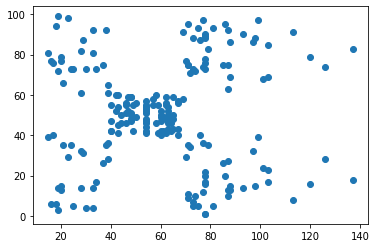

In [6]:
plt.scatter(X.iloc[:,0], X.iloc[:,1])

In [8]:
dist = []
for i in range(1,11):
    km = KMeans(n_clusters=i)
    km.fit(X)
    dist.append(km.inertia_)

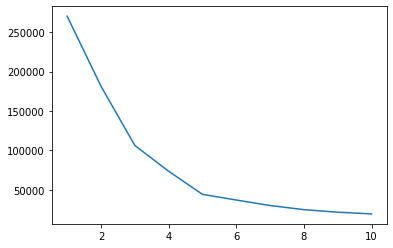

In [11]:
sns.lineplot(range(1,11), dist)

In [12]:
km = KMeans(n_clusters=6)
km.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [13]:
centroid = km.cluster_centers_
centroid

array([[ 55.2962963 ,  49.51851852],
       [109.7       ,  82.        ],
       [ 88.2       ,  17.11428571],
       [ 26.30434783,  20.91304348],
       [ 78.55172414,  82.17241379],
       [ 25.72727273,  79.36363636]])

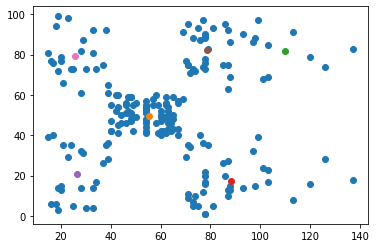

In [14]:
plt.scatter(X.iloc[:,0], X.iloc[:,1])
for cen in centroid:
    plt.scatter(cen[0], cen[1])

In [15]:
le = preprocessing.LabelEncoder()

In [16]:
data["Genre"] = le.fit_transform(data["Genre"])

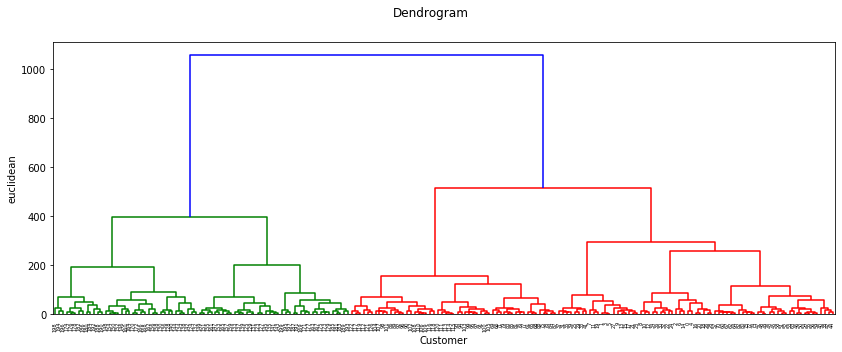

In [19]:
fig, ax = plt.subplots(figsize=[14,5])
dend = sch.dendrogram(sch.linkage(data, method='ward'), leaf_rotation=90, ax=ax)
fig.suptitle("Dendrogram")
plt.xlabel("Customer")
plt.ylabel("euclidean")
plt.show()